In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [162]:
df = pd.read_csv('data/gec_dataset.csv')
df.columns
# Set option to display all columns
pd.set_option('display.max_columns', None)

/var/folders/20/f03891t56yxd6lbd6m22l5rh0000gn/T/ipykernel_11172/1671460423.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/gec_dataset.csv')


In [163]:
# assignment given but not done
# Count the number of null values in the 'assignment_start_date' column
null_count = df['loader_id'].isnull().sum()

print("Number of null values in 'loader':", null_count)

Number of null values in 'loader': 136802


In [170]:
# Convert date columns to datetime format
# df['assignment_start_date'] = pd.to_datetime(df['assignment_start_date'].dt.date)
# df['assignment_due_date'] = pd.to_datetime(df['assignment_due_date'].dt.date)
# df['completed_at'] = pd.to_datetime(df['completed_at'].dt.date)

# Convert columns to datetime and extract date part in one step
date_columns = ['assignment_start_date', 'assignment_due_date', 'completed_at']
df[date_columns] = df[date_columns].apply(lambda col: pd.to_datetime(col).dt.date)

# Define conditions and corresponding statuses
conditions = [
    (df['completed_at'] < df['assignment_start_date']),
    (df['completed_at'] >= df['assignment_start_date']) & (df['completed_at'] <= df['assignment_due_date']),
    (df['completed_at'] > df['assignment_due_date']),
    (df['loader_id'].isnull())
]
statuses = ['early', 'on_time', 'late','not_attempted']

# Assign completion status based on conditions
df['completion_status'] = np.select(conditions, statuses, default='in_progress')

df['pass_score'] = (df['passed_count'] / df['total_problems_given'] * 100).round(2)

# Filter out rows where status is "passed" and pass_score is not greater than 0
df = df.drop(df[(df['progress_status'] == 'passed') & (df['pass_score'] < 1)].index)

df.head()


,district_id,school_id,teacher_id,event_id,loader_id,student_id,loader_classroom_id,calendar_classroom_id,course_id,lesson_group_id,lesson_id,total_problems_given,failed_count,passed_count,cefr_rate,completed_at,attempts_count,progress_status,problem_score,time_spent_on_lesson,loader_type,assignment_start_date,assignment_due_date,assignement_access_type,schedule_type,event_type,completion_status,pass_score
0,146,147,148,354956,NaN,NaN,NaN,1699,105,229,1016,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-05-15,2024-05-16,public,sequenced,calendar,not_attempted,NaN
1,146,147,148,354955,NaN,NaN,NaN,1699,105,229,1015,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-05-15,2024-05-16,public,sequenced,calendar,not_attempted,NaN
2,146,147,148,354953,NaN,NaN,NaN,1699,47,72,209,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-04-24,2024-04-24,public,non-sequenced,class_test,not_attempted,NaN
3,146,147,148,354952,NaN,NaN,NaN,1699,47,73,215,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-04-24,2024-04-27,public,non-sequenced,class_test,not_attempted,NaN
4,146,147,148,354947,25226.0,147.0,1699.0,1699,105,223,989,90.0,NaN,NaN,0.0,NaT,1.0,in_progress,0.0,285.0,class_test,2024-04-24,2024-04-27,public,sequenced,class_test,in_progress,NaN


In [ ]:
df.info()

In [167]:
# unique classroom
df.groupby('district_id')['calendar_classroom_id'].nunique()

district_id
5       250
146      35
258       1
336       2
353     182
485      41
1209     20
1765     53
2124      9
2140      7
2468     13
2530    885
2542      1
Name: calendar_classroom_id, dtype: int64

In [ ]:
df.groupby('calendar_classroom_id')['lesson_id']

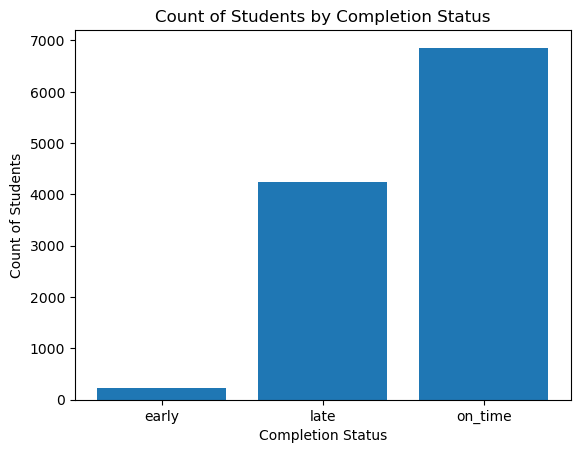

In [159]:
# Filter the DataFrame to include only rows where 'completed_at' is not null
df_filtered = df[df['completed_at'].notnull()]

# Group by completion status and count student_id
completion_status_counts = df_filtered.groupby('completion_status')['student_id'].count()

# Create a bar plot
plt.bar(completion_status_counts.index, completion_status_counts.values)

# Add labels and title
plt.xlabel('Completion Status')
plt.ylabel('Count of Students')
plt.title('Count of Students by Completion Status')

# Show the plot
plt.show()

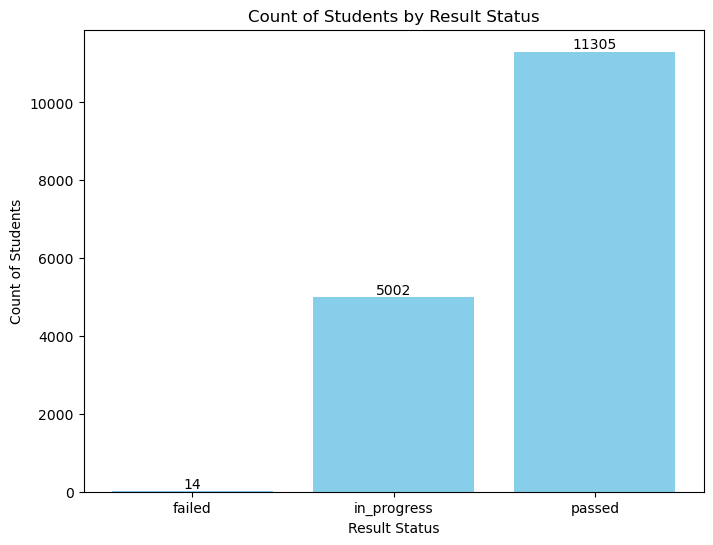

In [152]:

# Filter the DataFrame for rows with status "passed" or "failed"
filtered_result_df = df[df['progress_status'].isin(['in_progress', 'passed', 'failed'])]

# Perform groupby and count the occurrences of each status
result_status_counts = filtered_result_df.groupby('progress_status')['student_id'].count()


# Create a bar plot
# plt.bar(result_status_counts.index, result_status_counts.values)

# Create a bar plot with percentage labels
plt.figure(figsize=(8, 6))
bars = plt.bar(result_status_counts.index, result_status_counts.values, color='skyblue')

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')


# Add labels and title
plt.xlabel('Result Status')
plt.ylabel('Count of Students')
plt.title('Count of Students by Result Status')

# Show the plot
plt.show()

In [112]:
# Group the DataFrame by 'school_id' and 'progress_status' and count the occurrences
completion_status_counts = df[df['progress_status'].isin(['passed', 'failed'])].groupby(['school_id', 'progress_status']).size().unstack(fill_value=0)

# Display the result
print(completion_status_counts)

progress_status  failed  passed
school_id                      
6                     0     455
147                  11    2889
289                   2      48
337                   0      11
354                   0     195
495                   1     148
1210                  0    3047
1211                  0     655
1212                  0    3589
1766                  0       6
1810                  0       5
2046                  0     223
2125                  0       3
2531                  0       7
2543                  0       1
2575                  0      11
3977                  0       3
3989                  0       1
4017                  0       1
4085                  0       1
4179                  0       2
4239                  0       4


/var/folders/20/f03891t56yxd6lbd6m22l5rh0000gn/T/ipykernel_11172/1064204571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district_5['completed_at'] = pd.to_datetime(df_district_5['completed_at'])


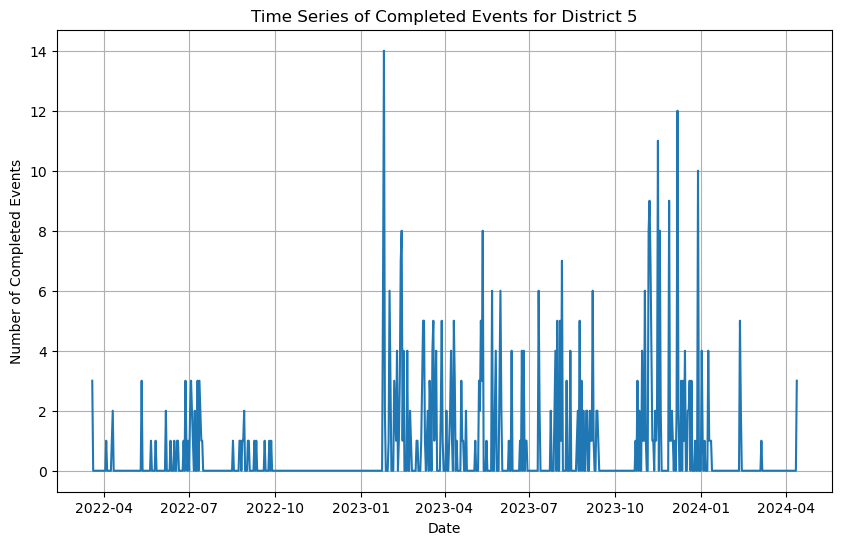

In [115]:
# Filter DataFrame for district 5
df_district_5 = df[df['district_id'] == 5]

# Convert 'completed_at' column to DateTime format
df_district_5['completed_at'] = pd.to_datetime(df_district_5['completed_at'])

# Set 'completed_at' as the index
df_district_5.set_index('completed_at', inplace=True)

# Resample the DataFrame to get time series data
# For example, resampling to daily frequency
time_series_data_district_5 = df_district_5.resample('D').size()

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data_district_5.index, time_series_data_district_5.values)
plt.xlabel('Date')
plt.ylabel('Number of Completed Events')
plt.title('Time Series of Completed Events for District 5')
plt.grid(True)
plt.show()

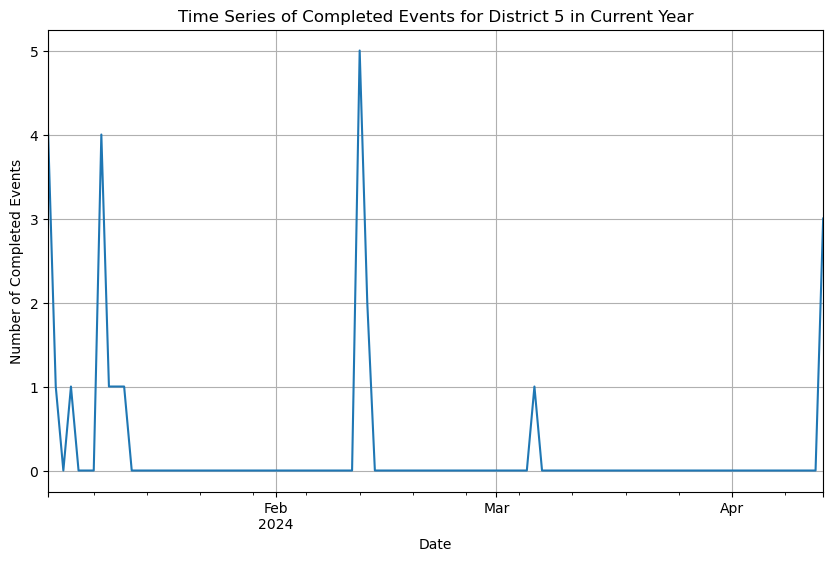

In [118]:
# Convert 'completed_at' column to datetime format
df['completed_at'] = pd.to_datetime(df['completed_at'])

# Filter DataFrame for events in the current year
current_year = datetime.datetime.now().year
df_current_year = df[df['completed_at'].dt.year == current_year]

# Filter DataFrame for district 5
df_district_5 = df_current_year[df_current_year['district_id'] == 5]

# Set 'completed_at' as the index
df_district_5.set_index('completed_at', inplace=True)

# Resample the DataFrame to get time series data
# For example, resampling to daily frequency
time_series_data_district_5 = df_district_5.resample('D').size()

# Plot the time series data
plt.figure(figsize=(10, 6))
time_series_data_district_5.plot()
plt.xlabel('Date')
plt.ylabel('Number of Completed Events')
plt.title('Time Series of Completed Events for District 5 in Current Year')
plt.grid(True)
plt.show()

school_id
6        498
147     4261
259        1
289       54
337       12
354      244
495      150
1210    3717
1211     729
1212    3701
1766       6
1810       5
2046     223
2125       4
2531       7
2543       1
2575      11
3977       3
3989       1
4017       1
4085       1
4179       2
4239       4
Name: lesson_id, dtype: int64


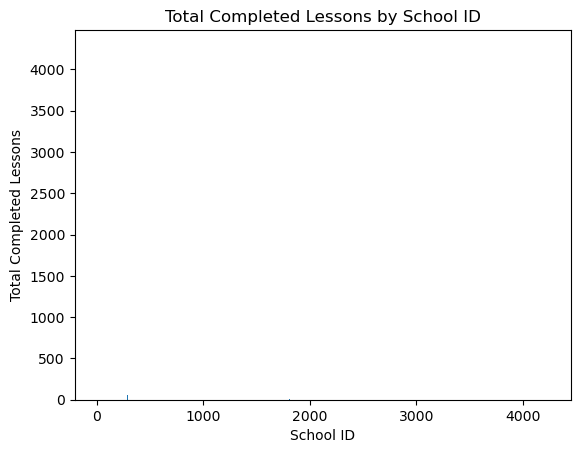

In [57]:
# Group by 'school_id' and count non-null 'lesson_id' values
lesson_count_by_school = df_filtered.groupby('school_id')['lesson_id'].count()

print(lesson_count_by_school)
# Create a bar plot
plt.bar(lesson_count_by_school.index, lesson_count_by_school.values)

# Add labels and title
plt.xlabel('School ID')
plt.ylabel('Total Completed Lessons')
plt.title('Total Completed Lessons by School ID')

# Show the plot
plt.show()

In [ ]:
# Adding additional calculations

district_school_counts = df.groupby('district_id')['school_id'].nunique()
print(district_school_counts)

In [18]:
district_teacher_counts = df.groupby('district_id')['teacher_id'].nunique()
print(district_teacher_counts)

district_id
5        7
146      4
258      1
336      2
353      5
485      9
1209     2
1765     8
2124     1
2140     1
2468     4
2530    29
2542     1
Name: teacher_id, dtype: int64


In [3]:
df.groupby('district_id')['user_id'].count()

district_id
5         802
146      4677
258         2
336        31
353       451
485       360
1209    12591
1765      328
2124       17
2140        7
2468       40
2530      112
2542       13
Name: user_id, dtype: int64

In [13]:
df_with_school = df.dropna(subset=['school_id'])  # Filter out rows where school_id is null
district_unique_user_counts = df_with_school.groupby('school_id')['user_id'].nunique()
print(district_unique_user_counts)

school_id
6        24
147     121
259       1
289       9
337       5
354      66
495      30
1210    146
1211     46
1212    161
1766     19
1810      5
2036      1
2046     21
2125      2
2141      1
2531     11
2536      1
2543      4
2548      2
2575      6
2586      3
3977      4
3981      1
3983      1
3989      2
4001      4
4017      1
4039      1
4041      1
4047      1
4071      1
4085      3
4179      1
4195      1
4217      1
4221      1
4225      1
4239      1
4251      1
4273      1
4283      1
4289      2
4291      1
4311      1
4327      1
Name: user_id, dtype: int64


In [14]:
# Filter rows where district_id is 6
df_district_6 = df[df['district_id'] == 6]

# Filter rows where school_id is not null
df_district_6_with_school = df_district_6.dropna(subset=['school_id'])

# Count occurrences of user_id
user_count_district_6 = df_district_6_with_school['user_id'].count()
print(user_count_district_6)

0


In [19]:
lesson_counts_by_user = df.groupby('user_id')['lesson_id'].nunique()
print(lesson_counts_by_user)

user_id
6        1
7       29
9       22
10      31
60       5
        ..
4138     3
4142     1
4149     1
4160     1
4181     3
Name: lesson_id, Length: 690, dtype: int64


In [20]:
# Filter the dataframe where district_id is 5
df_district_5 = df[df['district_id'] == 5]

# Count the number of unique lesson_ids grouped by user_id
lesson_counts_by_user_district_5 = df_district_5.groupby('user_id')['lesson_id'].nunique()
print(lesson_counts_by_user_district_5)

user_id
6         1
7        29
9        21
10       13
74        1
155      10
229      10
235       2
239      19
267      37
270      13
288       3
289       1
348       2
389       5
415       4
416       3
481     433
580       1
1074      1
2001      2
2139      1
2235     20
2236      3
2238     33
2239     29
2550      1
3959      1
3965      3
Name: lesson_id, dtype: int64


In [21]:
selected_columns = df[['user_id','cefr_rate', 'passed_count', 'failed_count', 'attempts_count', 'pass_score', 'total_problems_given']]
print(selected_columns)

       user_id  cefr_rate  passed_count  failed_count  attempts_count  \
0            9      32.14           0.0           6.0               1   
1          152      47.92           0.0          10.0               1   
2          150      50.00           0.0          10.0               1   
3          150      62.50           0.0          11.0               1   
4          154      29.17           1.0           8.0               1   
...        ...        ...           ...           ...             ...   
19426      147      16.15           6.0           9.0               1   
19427      147      14.58           6.0           9.0               1   
19428      147       0.00           NaN           NaN               1   
19429      147      16.67           9.0          10.0               1   
19430      147      16.67           9.0          10.0               1   

       pass_score  total_problems_given  
0            0.00                    12  
1            1.58                    10

In [126]:
# Define custom aggregation functions
def geometric_mean(x):
    return np.exp(np.mean(np.log(x)))

selected_columns_grouped = df.groupby('student_id').agg({
    'cefr_rate': geometric_mean,  # Assuming 'cefr_rate' is constant for each user
    'pass_score': 'mean',
    'failed_count': 'sum',
    'pass_score': 'mean'
}).reset_index()

print(selected_columns_grouped)
# selected_columns_grouped.to_csv('output/gec_user_reports.csv')

     student_id  cefr_rate  passed_count  failed_count  attempts_count  \
0             6   0.000000           0.0           0.0        1.000000   
1             7   0.000000          25.0         108.0        1.090909   
2             9   0.000000          25.0         133.0        1.217391   
3            10   0.000000          10.0          23.0        1.064516   
4            60   0.000000           0.0           0.0        1.000000   
..          ...        ...           ...           ...             ...   
675        4138  19.843836           4.0          15.0        2.666667   
676        4142  50.000000           0.0           2.0        1.000000   
677        4149   0.000000           0.0           0.0        1.000000   
678        4160   0.000000           0.0           0.0        1.000000   
679        4181  48.776996           1.0          23.0        2.000000   

     pass_score  total_problems_given  
0           NaN                    15  
1     12.726364                

/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [76]:
df_student_9 = df[df['student_id'] == 9]
df_student_9.head()
df_student_9.tail()

,district_id,school_id,teacher_id,loader_id,student_id,classroom_id,course_id,lesson_group_id,lesson_id,event_id,...,pass_score,time_spent_on_lesson,loader_type,assignment_start_date,assignment_due_date,assignement_access_type,schedule_type,event_type,completion_status,pass_percentage
19220,5,6,7,25092,9,1117,82,230,1020,2346,...,0.0,0.0,homework,2023-03-22,2023-03-25,public,sequenced,calendar,in_progress,NaN
19221,5,289,239,25093,9,849,45,180,802,1557,...,0.0,35.0,homework,2022-08-29,2022-08-30,public,sequenced,calendar,late,60.000000
19227,5,6,7,25102,9,1123,82,188,847,2382,...,0.0,10.0,homework,2023-03-23,2023-03-24,public,sequenced,class_test,in_progress,13.333333
19228,5,6,7,25103,9,1123,82,189,848,2383,...,0.0,0.0,homework,2023-03-23,2023-03-24,public,sequenced,class_test,in_progress,NaN
19237,5,6,7,25121,9,1123,82,189,848,2383,...,0.0,25.0,class_test,2023-03-23,2023-03-24,public,sequenced,class_test,in_progress,6.666667


In [37]:
df_student__9_report = df_student_9.groupby('user_id').agg({
    'cefr_rate': 'mean',  # Assuming 'cefr_rate' is constant for each user
    'passed_count': 'sum',
    'failed_count': 'sum',
    'attempts_count': 'mean',
    'pass_score': 'mean',
    'total_problems_given': 'sum'
}).reset_index()

# Calculate pass percentage
pass_percentage = df_student__9_report['passed_count'] / df_student__9_report['total_problems_given'] * 100
df_student__9_report.loc[:, 'pass_percentage'] = pass_percentage
df_student__9_report.head()

,user_id,cefr_rate,passed_count,failed_count,attempts_count,pass_score,total_problems_given,pass_percentage
0,9,25.098261,25.0,133.0,1.217391,15.429565,426,5.868545


In [95]:
# lesson completion over time
student9_df = df_student_9.copy()

# Drop rows where 'completed_at' is null or empty
student9_df = student9_df.dropna(subset=['completed_at'])
# student9_df.loc[:, 'completed_at'] = df_student_9['completed_at'].dt.to_period('M')
student9_df.head()

# result = student9_df.groupby([df['completed_at'], 'lesson_id']).size().reset_index(name='count')
# Convert 'completed_at' to datetime
student9_df['completed_at'] = pd.to_datetime(student9_df['completed_at'])
# Set 'completed_at' as the index
student9_df.set_index('completed_at', inplace=True)
# Resample data on a monthly basis and count lesson_id occurrences
monthly_data = student9_df.resample('M').agg({
    'cefr_rate': 'mean',
    'passed_count': 'sum',
    'failed_count': 'sum',
    'attempts_count': 'mean',
    'pass_score': 'mean',
    'total_problems_given': 'sum',
    'lesson_id': 'count'  # Count lessons completed
})

monthly_data.index = monthly_data.index.strftime('%Y-%m')

print(monthly_data)

# monthly_lesson_count = student9_df['lesson_id'].resample('M').count()
# print(monthly_lesson_count)


              cefr_rate  passed_count  failed_count  attempts_count  \
completed_at                                                          
2023-03          33.125           8.0          72.0             1.0   
2023-04             NaN           0.0           0.0             NaN   
2023-05             NaN           0.0           0.0             NaN   
2023-06             NaN           0.0           0.0             NaN   
2023-07             NaN           0.0           0.0             NaN   
2023-08             NaN           0.0           0.0             NaN   
2023-09             NaN           0.0           0.0             NaN   
2023-10             NaN           0.0           0.0             NaN   
2023-11             NaN           0.0           0.0             NaN   
2023-12             NaN           0.0           0.0             NaN   
2024-01             NaN           0.0           0.0             NaN   
2024-02             NaN           0.0           0.0             NaN   
2024-0

In [124]:
# Set 'completed_at' as the index
monthly_data.set_index('completed_at', inplace=True)

# Interpolate missing values
monthly_data.interpolate(inplace=True)

# Plot graph
fig, ax = plt.subplots(figsize=(10, 6))

for col in monthly_data.columns:
    ax.plot(df.index, df[col], label=col)

ax.set_xlabel('Date')
ax.set_ylabel('Metrics')
ax.set_title('Metrics Over Time')
ax.legend()
ax.grid(True)

plt.show()

KeyError: "None of ['completed_at'] are in the columns"

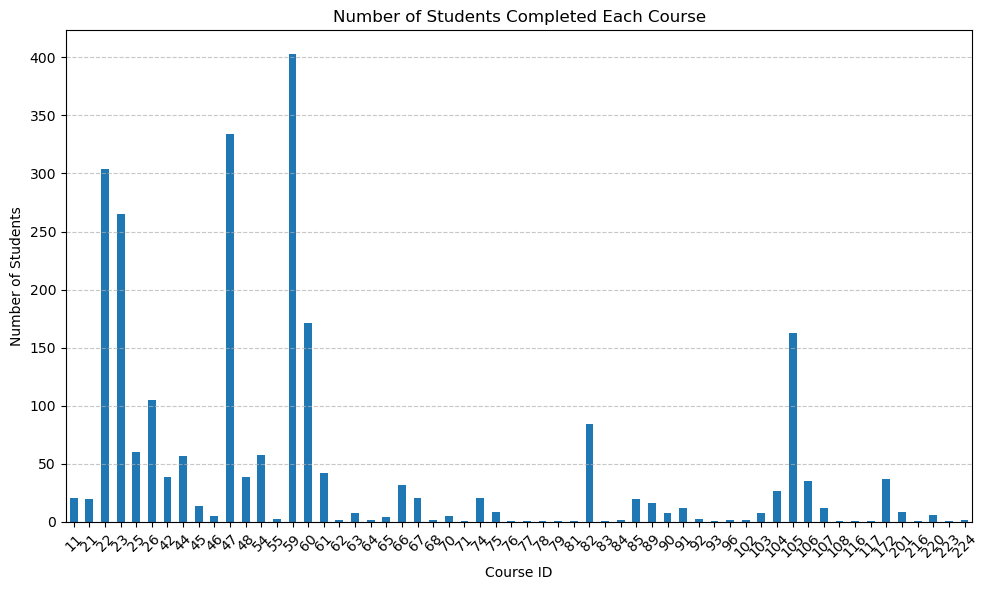

In [120]:
# Group by 'course_id' and count the number of unique 'student_id'
course_completion_counts = df.groupby('course_id')['student_id'].nunique()

# Plot the graph
plt.figure(figsize=(10, 6))
course_completion_counts.plot(kind='bar')
plt.xlabel('Course ID')
plt.ylabel('Number of Students')
plt.title('Number of Students Completed Each Course')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [171]:
teacher_148_df = df[df['teacher_id'] == 148]
teacher_148_df.head()

,district_id,school_id,teacher_id,event_id,loader_id,student_id,loader_classroom_id,calendar_classroom_id,course_id,lesson_group_id,lesson_id,total_problems_given,failed_count,passed_count,cefr_rate,completed_at,attempts_count,progress_status,problem_score,time_spent_on_lesson,loader_type,assignment_start_date,assignment_due_date,assignement_access_type,schedule_type,event_type,completion_status,pass_score
0,146,147,148,354956,NaN,NaN,NaN,1699,105,229,1016,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-05-15,2024-05-16,public,sequenced,calendar,not_attempted,NaN
1,146,147,148,354955,NaN,NaN,NaN,1699,105,229,1015,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-05-15,2024-05-16,public,sequenced,calendar,not_attempted,NaN
2,146,147,148,354953,NaN,NaN,NaN,1699,47,72,209,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-04-24,2024-04-24,public,non-sequenced,class_test,not_attempted,NaN
3,146,147,148,354952,NaN,NaN,NaN,1699,47,73,215,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2024-04-24,2024-04-27,public,non-sequenced,class_test,not_attempted,NaN
4,146,147,148,354947,25226.0,147.0,1699.0,1699,105,223,989,90.0,NaN,NaN,0.0,NaT,1.0,in_progress,0.0,285.0,class_test,2024-04-24,2024-04-27,public,sequenced,class_test,in_progress,NaN


In [175]:
agg_data = teacher_148_df.groupby('calendar_classroom_id').agg({
    'cefr_rate': 'mean',
    'pass_score': 'mean',
    'lesson_id': 'count'
})

agg_data

,cefr_rate,pass_score,lesson_id
calendar_classroom_id,,,
171,40.280000,7.036667,8
239,NaN,NaN,1
288,71.232056,13.751316,182
589,68.340667,11.227882,195
590,67.001791,12.552330,202
591,61.308309,12.164605,137
592,70.614807,12.869571,182
835,60.907035,11.815934,172
836,48.741825,14.147086,264
